In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/raw_btc_data.csv')

In [3]:
# Convert timestamp columns to datetime
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
if 'close_time' in df.columns:
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31665 entries, 0 to 31664
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           31665 non-null  datetime64[ns]
 1   open                31665 non-null  float64       
 2   high                31665 non-null  float64       
 3   low                 31665 non-null  float64       
 4   close               31665 non-null  float64       
 5   volume              31665 non-null  float64       
 6   close_time          31665 non-null  datetime64[ns]
 7   quote_asset_volume  31665 non-null  float64       
 8   num_trades          31665 non-null  int64         
 9   taker_buy_base      31665 non-null  float64       
 10  taker_buy_quote     31665 non-null  float64       
 11  ignore              31665 non-null  int64         
dtypes: datetime64[ns](2), float64(8), int64(2)
memory usage: 2.9 MB


In [4]:
df.set_index('timestamp', inplace=True)

In [25]:
df.shape, df.head()

((31665, 11),
                          open      high       low     close      volume  \
 timestamp                                                                 
 2022-01-01 00:00:00  46216.93  46731.39  46208.37  46656.13  1503.33095   
 2022-01-01 01:00:00  46656.14  46949.99  46574.06  46778.14   943.81539   
 2022-01-01 02:00:00  46778.14  46928.94  46721.96  46811.77   485.16860   
 2022-01-01 03:00:00  46811.77  46916.63  46760.12  46813.20   562.88971   
 2022-01-01 04:00:00  46813.21  46887.33  46591.23  46711.05   861.88389   
 
                                  close_time  quote_asset_volume  num_trades  \
 timestamp                                                                     
 2022-01-01 00:00:00 2022-01-01 00:59:59.999        6.987999e+07       38608   
 2022-01-01 01:00:00 2022-01-01 01:59:59.999        4.412715e+07       31872   
 2022-01-01 02:00:00 2022-01-01 02:59:59.999        2.272067e+07       24364   
 2022-01-01 03:00:00 2022-01-01 03:59:59.999        

In [5]:
bitcoin_prices = pd.DataFrame(df['close']).rename(columns={'close':"price"})
bitcoin_prices.head()

,price
timestamp,
2022-01-01 00:00:00,46656.13
2022-01-01 01:00:00,46778.14
2022-01-01 02:00:00,46811.77
2022-01-01 03:00:00,46813.20
2022-01-01 04:00:00,46711.05


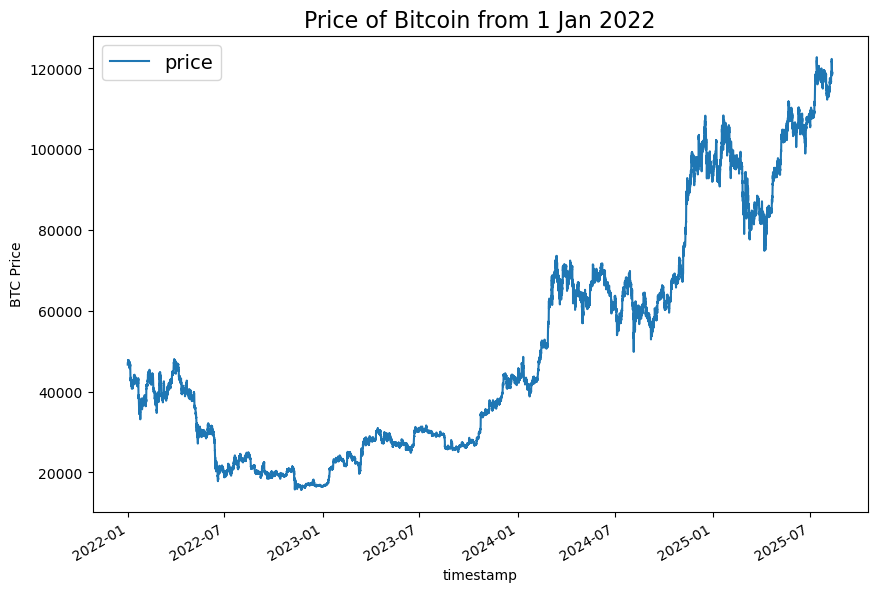

In [6]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Jan 2022", fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [6]:
# Lấy mảng bitcoin date
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2022-01-01T00:00:00.000000000', '2022-01-01T01:00:00.000000000',
        '2022-01-01T02:00:00.000000000', '2022-01-01T03:00:00.000000000',
        '2022-01-01T04:00:00.000000000', '2022-01-01T05:00:00.000000000',
        '2022-01-01T06:00:00.000000000', '2022-01-01T07:00:00.000000000',
        '2022-01-01T08:00:00.000000000', '2022-01-01T09:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([46656.13, 46778.14, 46811.77, 46813.2 , 46711.05, 47192.55,
        46979.62, 47194.73, 47124.82, 47143.98]))

In [7]:
# Tạo train/test split đúng cách cho dữ liệu chuỗi thời gian
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Tạo phân tách dữ liệu huấn luyện (mọi thứ trước khi phân tách)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Tạo phần tách dữ liệu kiểm tra (mọi thứ sau khi phân tách)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(25332, 6333, 25332, 6333)

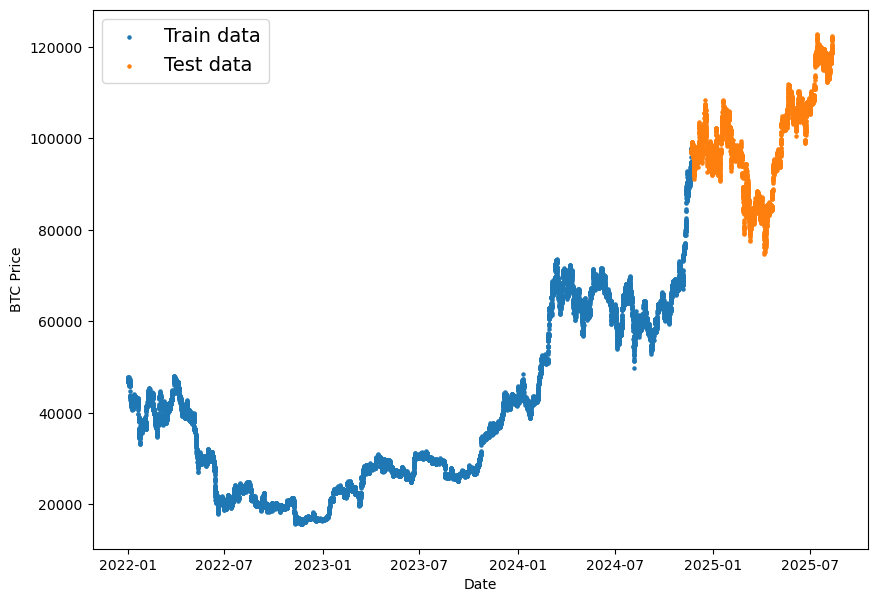

In [9]:
# Biểu đồ tạo các phân tách chính xác
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [8]:
# Tạo một hàm vẽ biểu đồ dữ liệu chuỗi thời gian
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Vẽ biểu đồ các bước thời gian (một loạt các điểm trong thời gian) với các giá trị (một loạt các giá trị trên các bước thời gian).

  Tham số
  ---------
  timesteps : mảng của các bước thời gian
  values : mảng của các giá trị theo theo thời gian
  format : kiểu của biểu đồ, mặc định là "."
  start : nơi bắt đầu biểu đồ (đặt một giá trị sẽ lập chỉ mục từ start của timesteps & values)
  end : nơi kết thúc biểu đồ (đặt một giá trị sẽ lập chỉ mục từ end của timesteps & values)
  label : nhãn để hiển thị trên biểu đồ giá trị
  """
  # Vẽ biểu đồ các chuỗi
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # làm cho nhãn lớn hơn
  plt.grid(True)

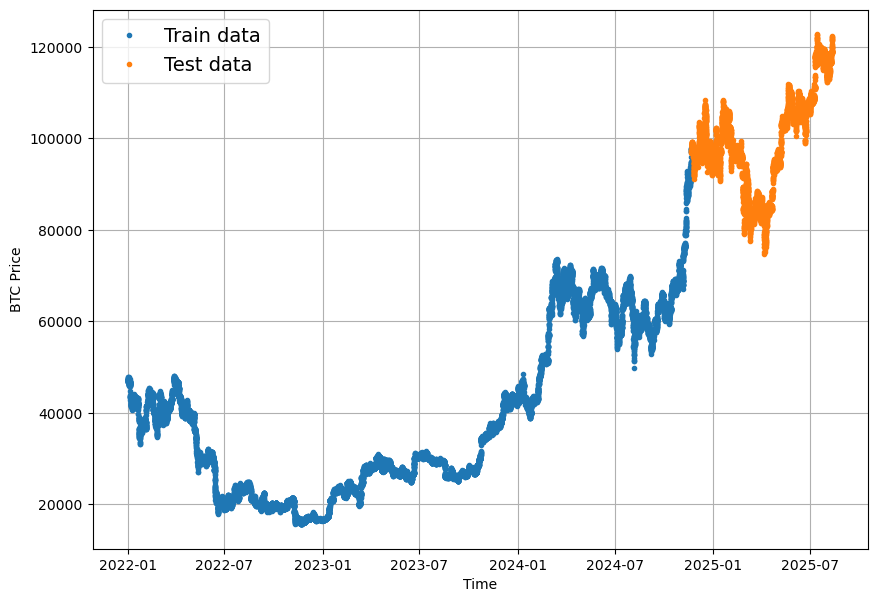

In [9]:
# Hãy thử hàm vẽ biểu đồ
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [10]:
# Tạo a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast bằng mọi giá trị không bao gồm giá trị cuối cùng
naive_forecast[:10], naive_forecast[-10:] # Hiển thị 10 giá trị đầu và 10 giá trị cuối

(array([97512.01, 97042.86, 96672.  , 97147.99, 98048.65, 98280.01,
        97829.83, 98118.16, 97973.8 , 98356.  ]),
 array([118686.  , 118949.31, 118977.1 , 119054.13, 118857.7 , 119067.97,
        118819.99, 118839.97, 118986.72, 118814.7 ]))

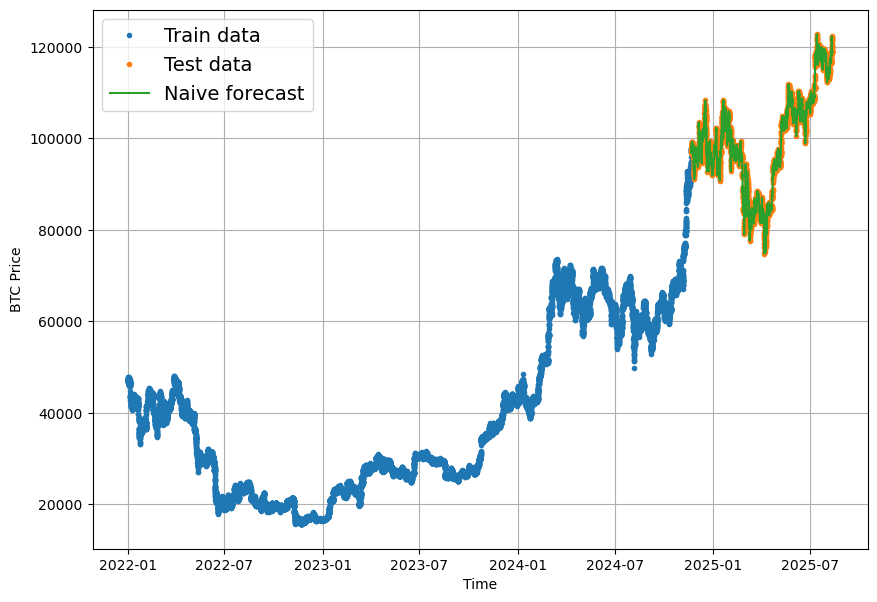

In [11]:
# Vẽ biểu đồ naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

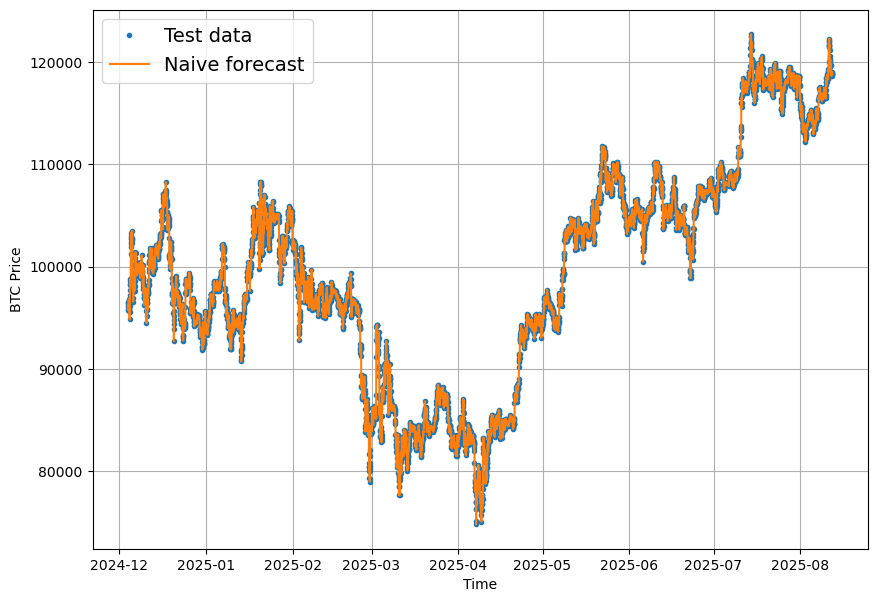

In [12]:
plt.figure(figsize=(10, 7))
offset = 300 # offset các giá trị 300 bước thời gian
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [13]:
# Hãy lấy TensorFlow!
import tensorflow as tf

In [14]:
# MASE đã lập trình sẵn của sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Lập trình MASE (giả sử dữ liệu không có tính thời vụ).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Tìm MAE của naive forecast (không có tính thời vụ)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # tính thời vụ là 1 day (do đó dịch chuyển 1 day)

  return mae / mae_naive_no_season

In [21]:
def evaluate_preds(y_true, y_pred):
  # Đảm bảo float32 (để tính toán phép đo)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Tính toán nhiều phép đo khác nhau
  mae = tf.keras.metrics.mae(y_true, y_pred)
  mse = tf.keras.metrics.mse(y_true, y_pred) # đặt và nhấn mạnh vào các outlier (tất cả các sai số được bình phương)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': np.float32(320.13614),
 'mse': np.float32(234859.5),
 'rmse': np.float32(484.62305),
 'mape': np.float32(0.32871366),
 'mase': np.float32(1.0000736)}

In [23]:
HORIZON = 1 # dự đoán từng bước một
WINDOW_SIZE = 7 # sử dụng các bước thời gian có giá trị một tuần để dự đoán horizon

In [24]:
# Tạo hàm gắn nhãn dữ liệu window
def get_labelled_windows(x, horizon=1):
  """
  Tạo nhãn cho tập dữ liệu window.

  Ví dụ: if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
# Kiểm tra hàm gắn nhãn window
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [26]:
# Tạo hàm để xem mảng NumPy dưới dạng window
def make_windows(x, window_size=7, horizon=1):
  """
  Biến mảng 1D thành mảng 2D gồm các window tuần tự của window_size.
  """
  # 1. Tạo một window có window_size cụ thể (thêm horizon vào cuối để gắn nhãn sau này)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Tạo mảng 2D gồm nhiều bước window (trừ 1 để tính đến 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # tạo mảng 2D có các window với window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Lập chỉ mục trên mảng đích (chuỗi thời gian) với mảng 2D gồm nhiều bước window
  windowed_array = x[window_indexes]

  # 4. Lấy các window được gắn nhãn
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [27]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(31658, 31658)

In [28]:
# Xem 3 window/nhãn đầu tiên
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [46656.13 46778.14 46811.77 46813.2  46711.05 47192.55 46979.62] -> Label: [47194.73]
Window: [46778.14 46811.77 46813.2  46711.05 47192.55 46979.62 47194.73] -> Label: [47124.82]
Window: [46811.77 46813.2  46711.05 47192.55 46979.62 47194.73 47124.82] -> Label: [47143.98]


In [29]:
# Xem 3 window/nhãn cuối
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [118949.31 118977.1  119054.13 118857.7  119067.97 118819.99 118839.97] -> Label: [118986.72]
Window: [118977.1  119054.13 118857.7  119067.97 118819.99 118839.97 118986.72] -> Label: [118814.7]
Window: [119054.13 118857.7  119067.97 118819.99 118839.97 118986.72 118814.7 ] -> Label: [118646.74]


In [30]:
# Tạo phân tách huấn luyện/kiểm tra
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Tách các cặp window và label thành các train/test split.
  """
  split_size = int(len(windows) * (1-test_split)) # điều này mặc định thành 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(25326, 6332, 25326, 6332)

In [32]:
train_windows[:5], train_labels[:5]

(array([[46656.13, 46778.14, 46811.77, 46813.2 , 46711.05, 47192.55,
         46979.62],
        [46778.14, 46811.77, 46813.2 , 46711.05, 47192.55, 46979.62,
         47194.73],
        [46811.77, 46813.2 , 46711.05, 47192.55, 46979.62, 47194.73,
         47124.82],
        [46813.2 , 46711.05, 47192.55, 46979.62, 47194.73, 47124.82,
         47143.98],
        [46711.05, 47192.55, 46979.62, 47194.73, 47124.82, 47143.98,
         46871.08]]),
 array([[47194.73],
        [47124.82],
        [47143.98],
        [46871.08],
        [46758.87]]))

In [39]:
import os

# Tạo một hàm lập trình ModelCheckpoint callback với filename cụ thể
def create_model_checkpoint(model_name, save_path="..\models"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # tạo filepath để lưu mô hình
                                            verbose=0, # chỉ xuất một lượng văn bản hạn chế
                                            save_best_only=True) # chỉ lưu mô hình tốt nhất vào file

In [41]:
import tensorflow as tf
from tensorflow.keras import layers

# Thiết lập random seed để có kết quả lặp lại nhiều nhất có thể
tf.random.set_seed(42)

# Xây dựng mô hình
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # kích hoạt tuyến tính cũng giống như không có kích hoạt
], name="model_1_dense.keras") # đặt tên cho mô hình để lưu nó

# Biên dịch mô hình
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # chúng ta không nhất thiết cần điều này khi hàm mất mát là MAE

# Khớp mô hình
model_1.fit(x=train_windows, # huấn luyện window có 7 bước thời gian của giá Bitcoin
            y=train_labels, # giá trị horizon là 1 (sử dụng 7 bước thời gian trước đó để dự đoán ngày hôm sau)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # tạo ModelCheckpoint callback để lưu mô hình tốt nhất

Epoch 1/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2995.8123 - mae: 2995.8123 - val_loss: 488.5602 - val_mae: 488.5602
Epoch 2/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.2429 - mae: 216.2429 - val_loss: 460.9381 - val_mae: 460.9381
Epoch 3/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227.2423 - mae: 227.2423 - val_loss: 468.6132 - val_mae: 468.6132
Epoch 4/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 217.3303 - mae: 217.3303 - val_loss: 791.0274 - val_mae: 791.0274
Epoch 5/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.6288 - mae: 233.6288 - val_loss: 552.9092 - val_mae: 552.9092
Epoch 6/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229.2815 - mae: 229.2815 - val_loss: 634.6526 - val_mae: 634.6526
Epoch 7/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 269.9697 - mae: 269.9697 - val_loss: 583.4247 - val_mae: 583.4247
Epoch 8/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 211.6107 - mae: 211.6107 - val_loss: 505.2222 - 

In [42]:
# Đánh giá mô hình trên dữ liệu kiểm tra
model_1.evaluate(test_windows, test_labels)

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 436.0500 - mae: 436.0500


[436.050048828125, 436.050048828125]

In [45]:
# Load vào model_1 hoạt động tốt nhất đã lưu và đánh giá trên dữ liệu kiểm tra
model_1 = tf.keras.models.load_model("../models/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 340.5757 - mae: 340.5757


[340.5757141113281, 340.5757141113281]

In [46]:
def make_preds(model, input_data):
  """
  Sử dụng mô hình để đưa ra dự đoán về input_data.

  Tham số
  ----------
  model:  mô hình đã huấn luyện
  input_data: dữ liệu đầu vào ở dạng window (cùng một loại dữ liệu mà mô hình dữ liệu được huấn luyện)

  Trả về các dự đoán của mô hình về input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # trả về mảng 1D của các dự đoán

In [47]:
# Đưa ra dự đoán bằng cách sử dụng model_1 trên tập dữ liệu kiểm tra và xem kết quả
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(6332,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([97502.83 , 97206.93 , 96789.74 , 97045.23 , 97700.11 , 98111.09 ,
        98091.79 , 98173.38 , 97994.984, 98136.555], dtype=float32)>)

In [48]:
# Đánh giá preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # giảm xuống shape phù hợp
                                 y_pred=model_1_preds)
model_1_results

{'mae': np.float32(340.5758),
 'mse': np.float32(266794.0),
 'rmse': np.float32(516.52106),
 'mape': np.float32(0.34956494),
 'mase': np.float32(1.063925)}

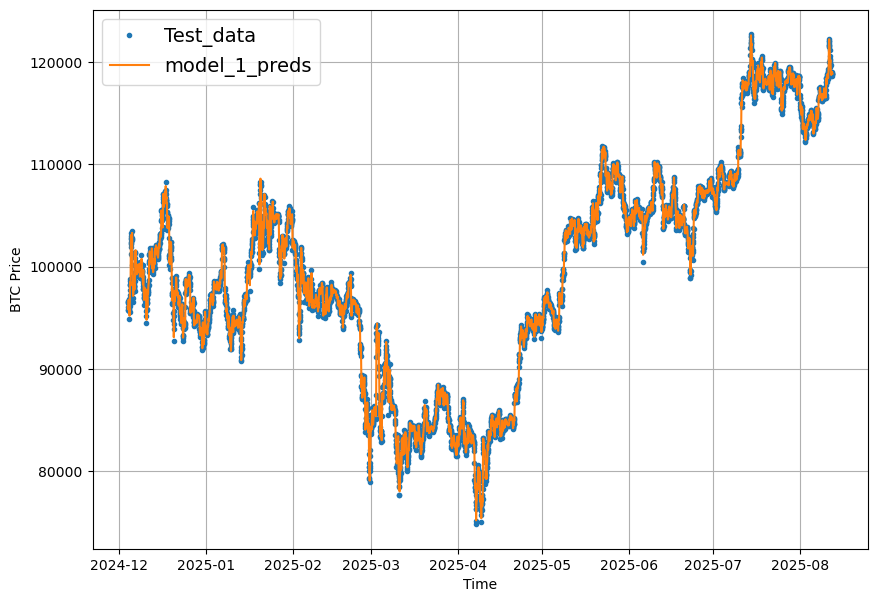

In [49]:
offset = 300
plt.figure(figsize=(10, 7))
# Tính toán test_window offset và lập chỉ mục vào test_labels để đảm bảo vẽ đúng
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [50]:
# Kiểm tra shape của mẫu dữ liệu
train_windows[0].shape # trả về (WINDOW_SIZE, )

(7,)